# Benchmark Huygens to Flowdec

This is a notebeook that co-plots benchmark stacks processed with Huygens (2022, SVI) and our open-source richardson-lucy implementation (flowdec, https://github.com/hammerlab/flowdec)

In [1]:
from skimage import exposure, io
from scipy.ndimage import gaussian_filter
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

2024-04-11 01:56:19.071848: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
#@FIXME copy images either in github LFS or pool-pub
#@FIXME convert all images to same datatype, dtype is still TBD
stack_scaled = io.imread('/fs/pool/pool-plitzko3/Johann/03-Data/04-LightMicroscopy/EMBO_course_decon_testing/input.tif')
output = io.imread('/fs/pool/pool-plitzko3/Johann/03-Data/04-LightMicroscopy/EMBO_course_decon_testing/RAGE_01_Pos_01_3_cmle_ch00.tif')
output_2 = io.imread('/fs/pool/pool-plitzko3/Johann/03-Data/04-LightMicroscopy/EMBO_course_decon_testing/decon_100iter.tif')

Application of a gaussian filter (aka low-pass) to the flowdec-deconvoluted image to limit noise artifacts beyond nquist

In [3]:
output_2 = gaussian_filter(output_2.astype(np.float32),1.5)

In [4]:
images_to_plot = [stack_scaled, output , output_2]
titles = ['Original Image', 'Hyugens Decon', 'Flowdec Decon']
slices = [(750,1000), (650,900)]

(750, 1000)

## Plots of Maximum Intensity Projections (MIPs) of the tested stacks

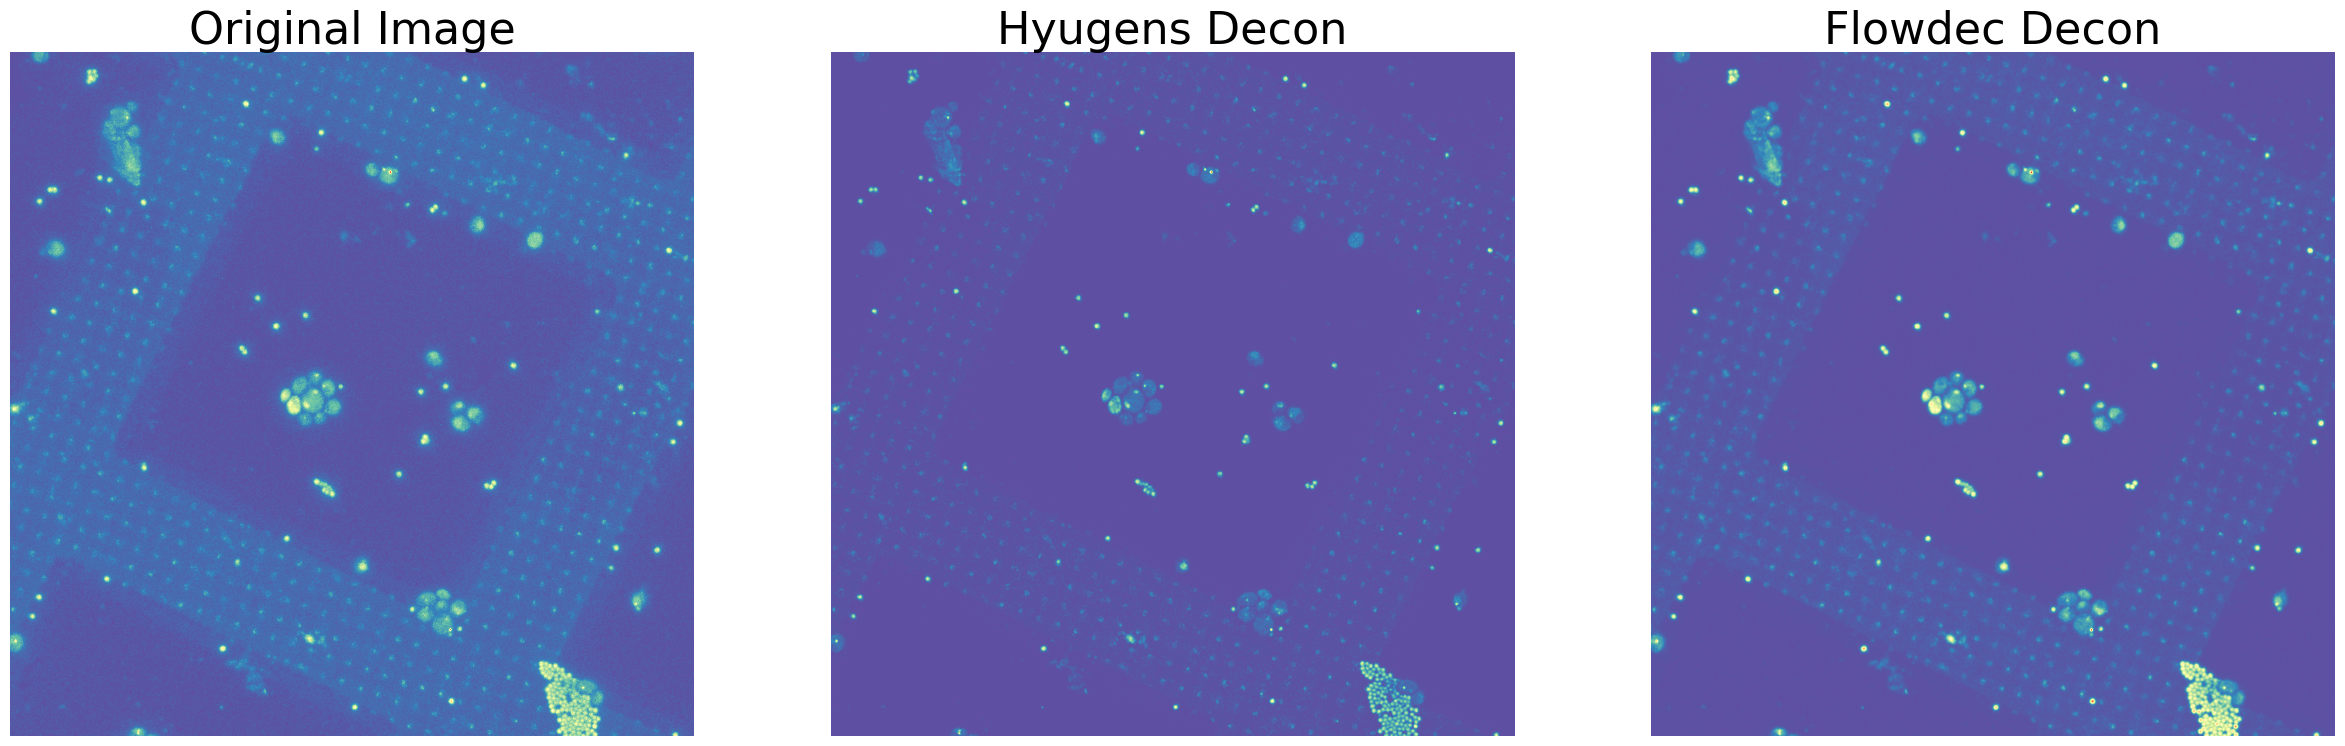

In [5]:
fig, axs = plt.subplots(1, len(images_to_plot))
axs = axs.ravel()
fig.set_size_inches(30, 15)
center = tuple([slice(None), slice(10, -10), slice(10, -10)])

for i, d in enumerate(images_to_plot):#res.data
    img = exposure.adjust_gamma(d[center].max(axis=0), gamma=1)
    axs[i].imshow(img, cmap='Spectral_r')
    axs[i].set_title(titles[i],fontsize=32)
    axs[i].axis('off')

### Selected area of the MIPs from above to illustrate the resolution of a single or double bead (1 micron diameter)

(2048, 2048)
(2048, 2048)
(2048, 2048)


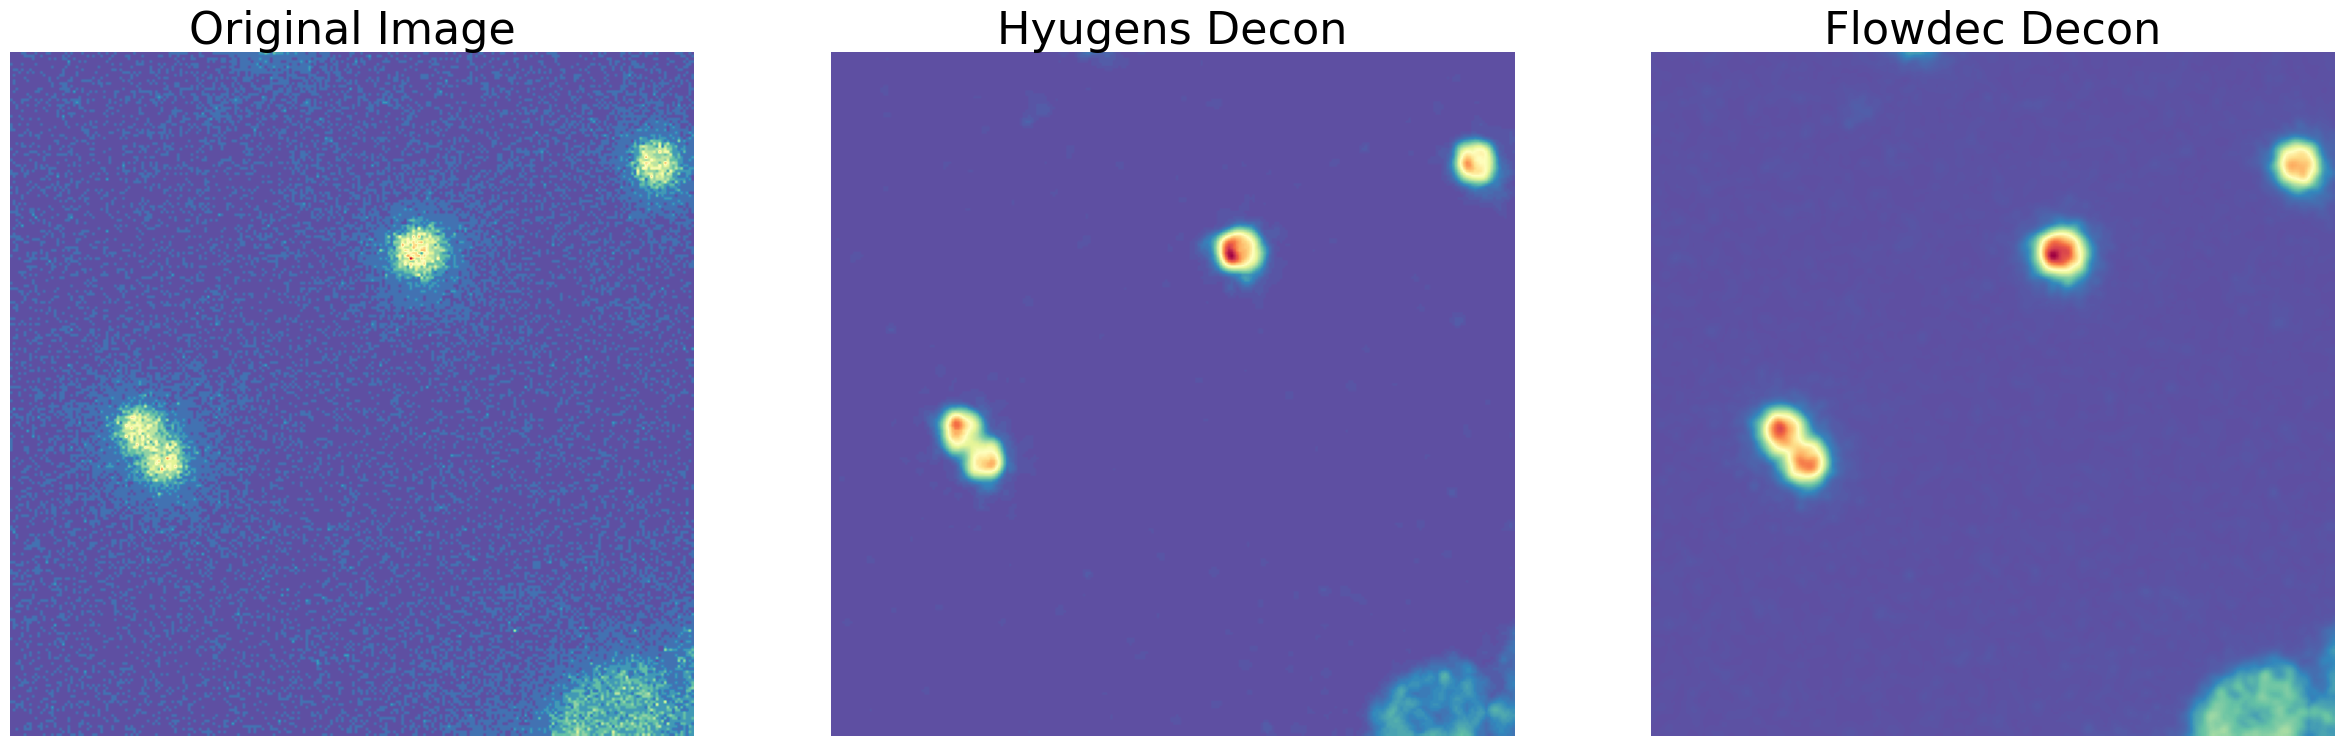

In [6]:
fig, axs = plt.subplots(1, len(images_to_plot))
axs = axs.ravel()
fig.set_size_inches(30, 15)
center = tuple([slice(None), slice(10, -10), slice(10, -10)])

for i, d in enumerate(images_to_plot):#res.data
    img = exposure.adjust_gamma(d.max(axis=0), gamma=1)
    print(img.shape)
    axs[i].imshow(img[slices[0][0]:slices[0][1],slices[1][0]:slices[1][1]], cmap='Spectral_r')
    axs[i].set_title(titles[i],fontsize=32)
    axs[i].axis('off')

### Side view (XZ-MIP) of the selected area to observe PSF-removal artifacts

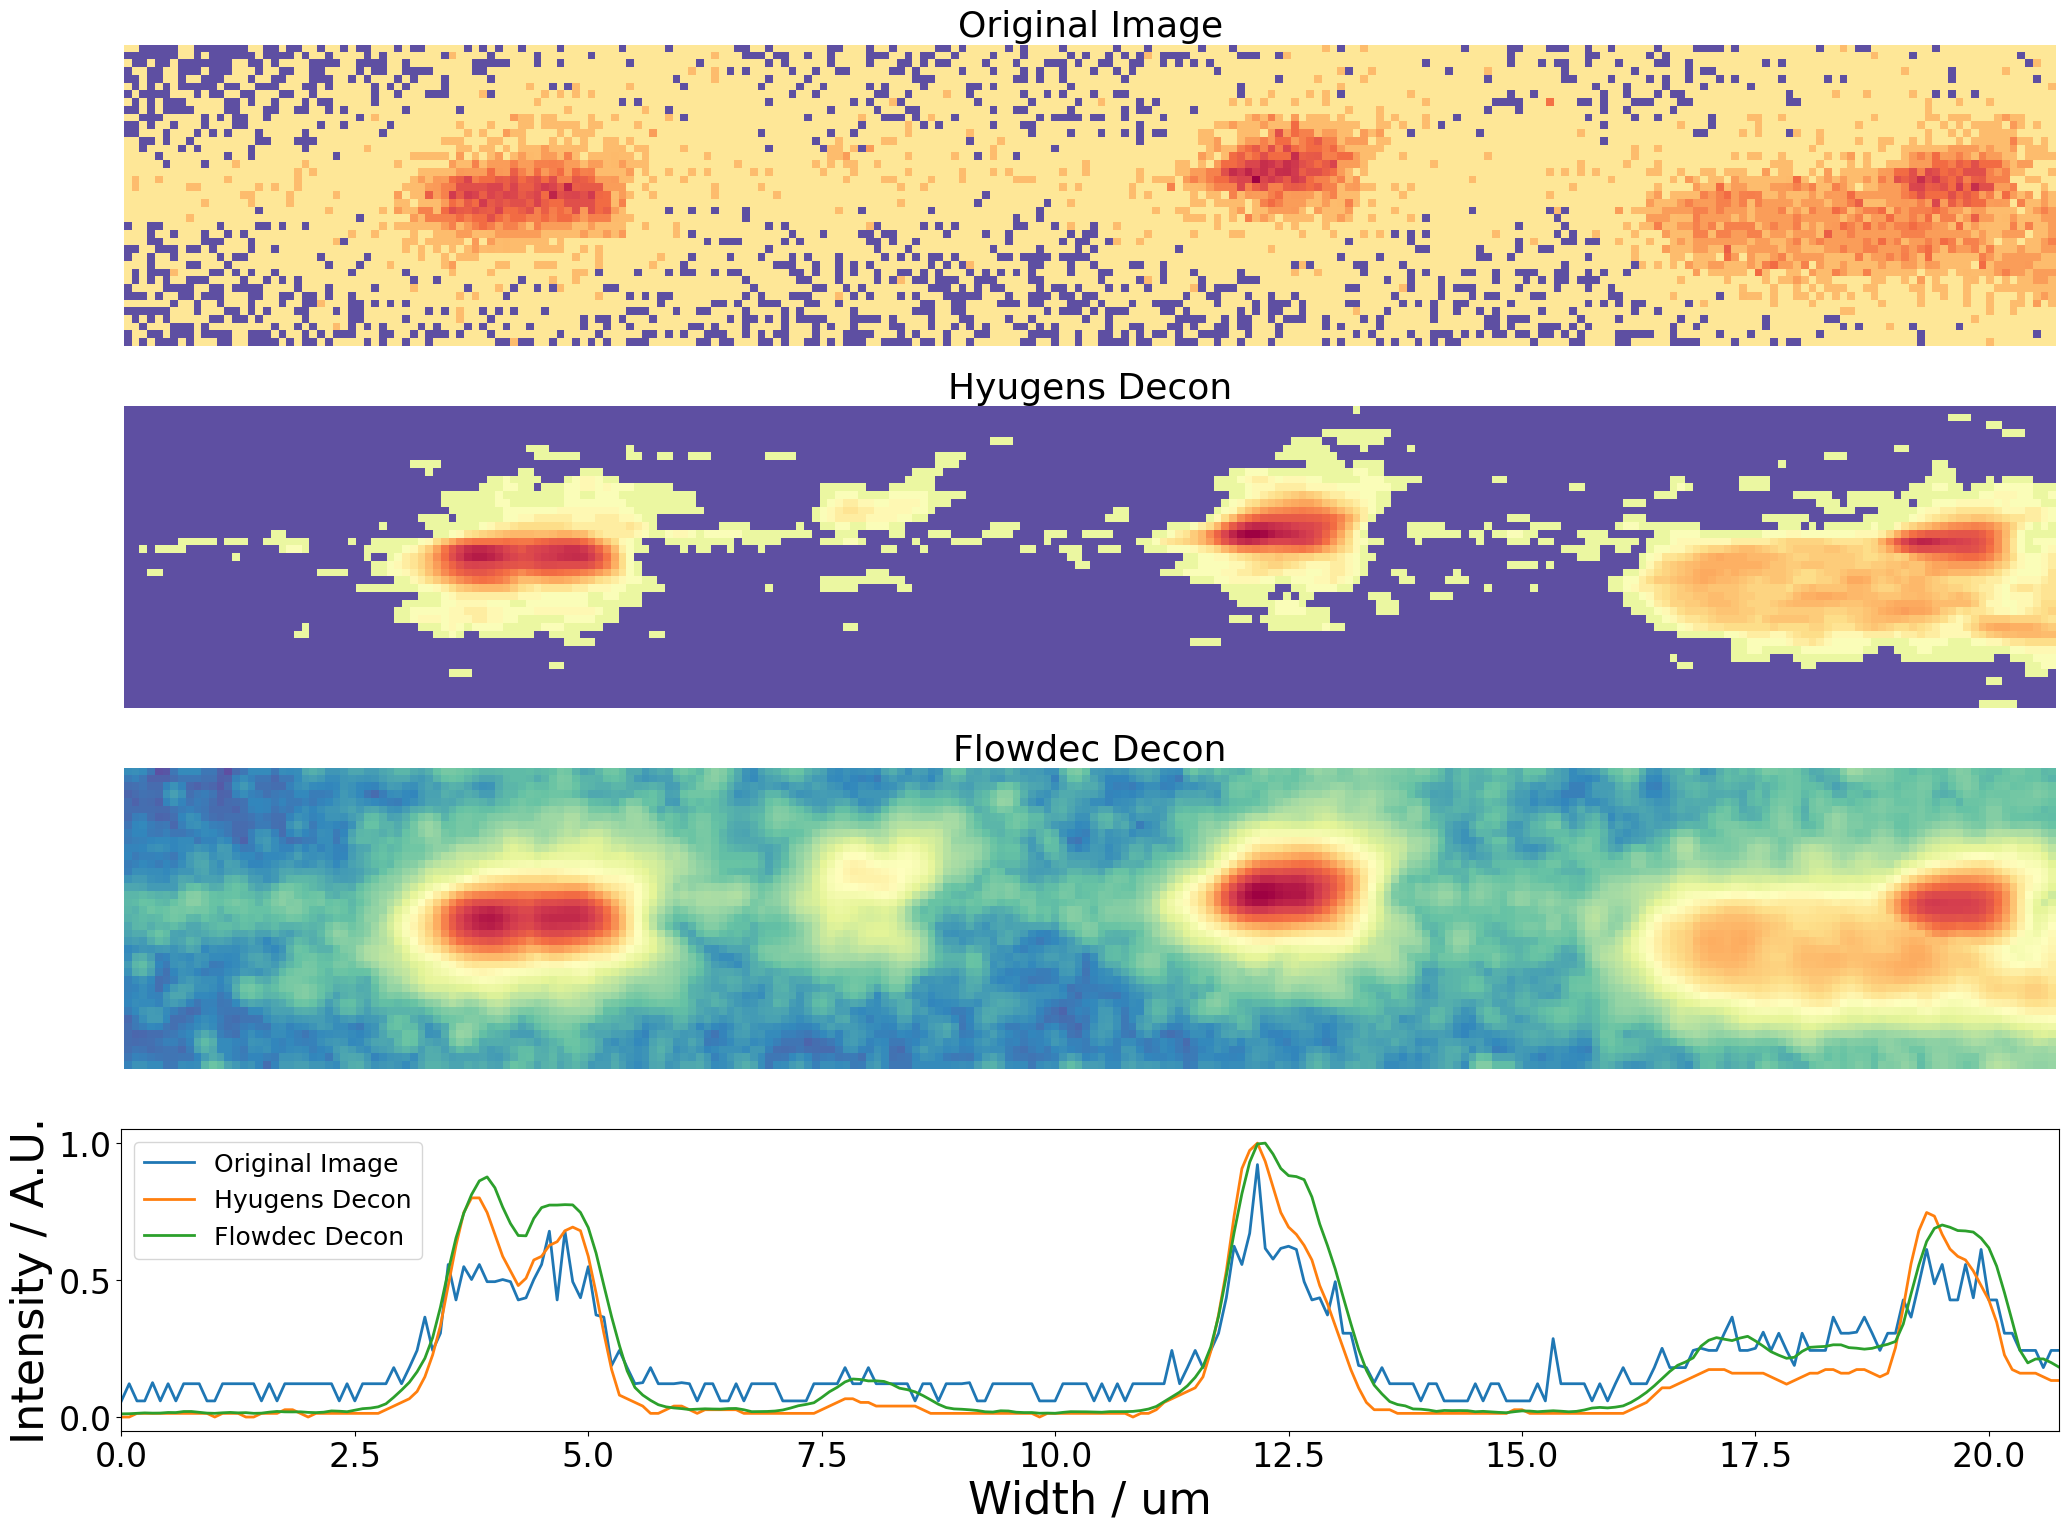

In [39]:
def xz_project(img):
    return np.max(img, axis=1)

fig, axs = plt.subplots(len(images_to_plot)+1,1)
axs = axs.ravel()
fig.set_size_inches(25, 18)


xz_projection_data = [xz_project(img[:,slices[0][0]:slices[0][1],:]) for img in images_to_plot]

for i, d in enumerate(xz_projection_data):#res.data
    img = exposure.adjust_gamma(d,gamma=.2)
    axs[i].imshow(img[:,slices[1][0]:slices[1][1]], cmap='Spectral_r')
    axs[i].set_title(titles[i],fontsize=26)
    axs[i].axis('off')

x = np.linspace(0,slices[1][1]-slices[1][0],250)*0.083

for i, d in enumerate(xz_projection_data):#res.data
    img = exposure.adjust_gamma(d,gamma=1)
    line = np.max(img[:,slices[1][0]:slices[1][1]]/np.max(np.max(img)),axis=0)
    axs[-1].plot(x, line, label=titles[i],linewidth=2)
    #axs.set_title(titles[i],fontsize=26)
    axs[-1].tick_params(axis='x', labelsize=24)
    axs[-1].tick_params(axis='y', labelsize=24)
    axs[-1].set_xlabel('Width / um', fontsize=32)
    axs[-1].set_ylabel('Intensity / A.U.', fontsize=32)
    axs[-1].set_xlim([0,250*0.083]) 
    axs[-1].legend(fontsize=18)
    axs[-1].axis('on')

### Single line plot that averages the intensities from the side view projections

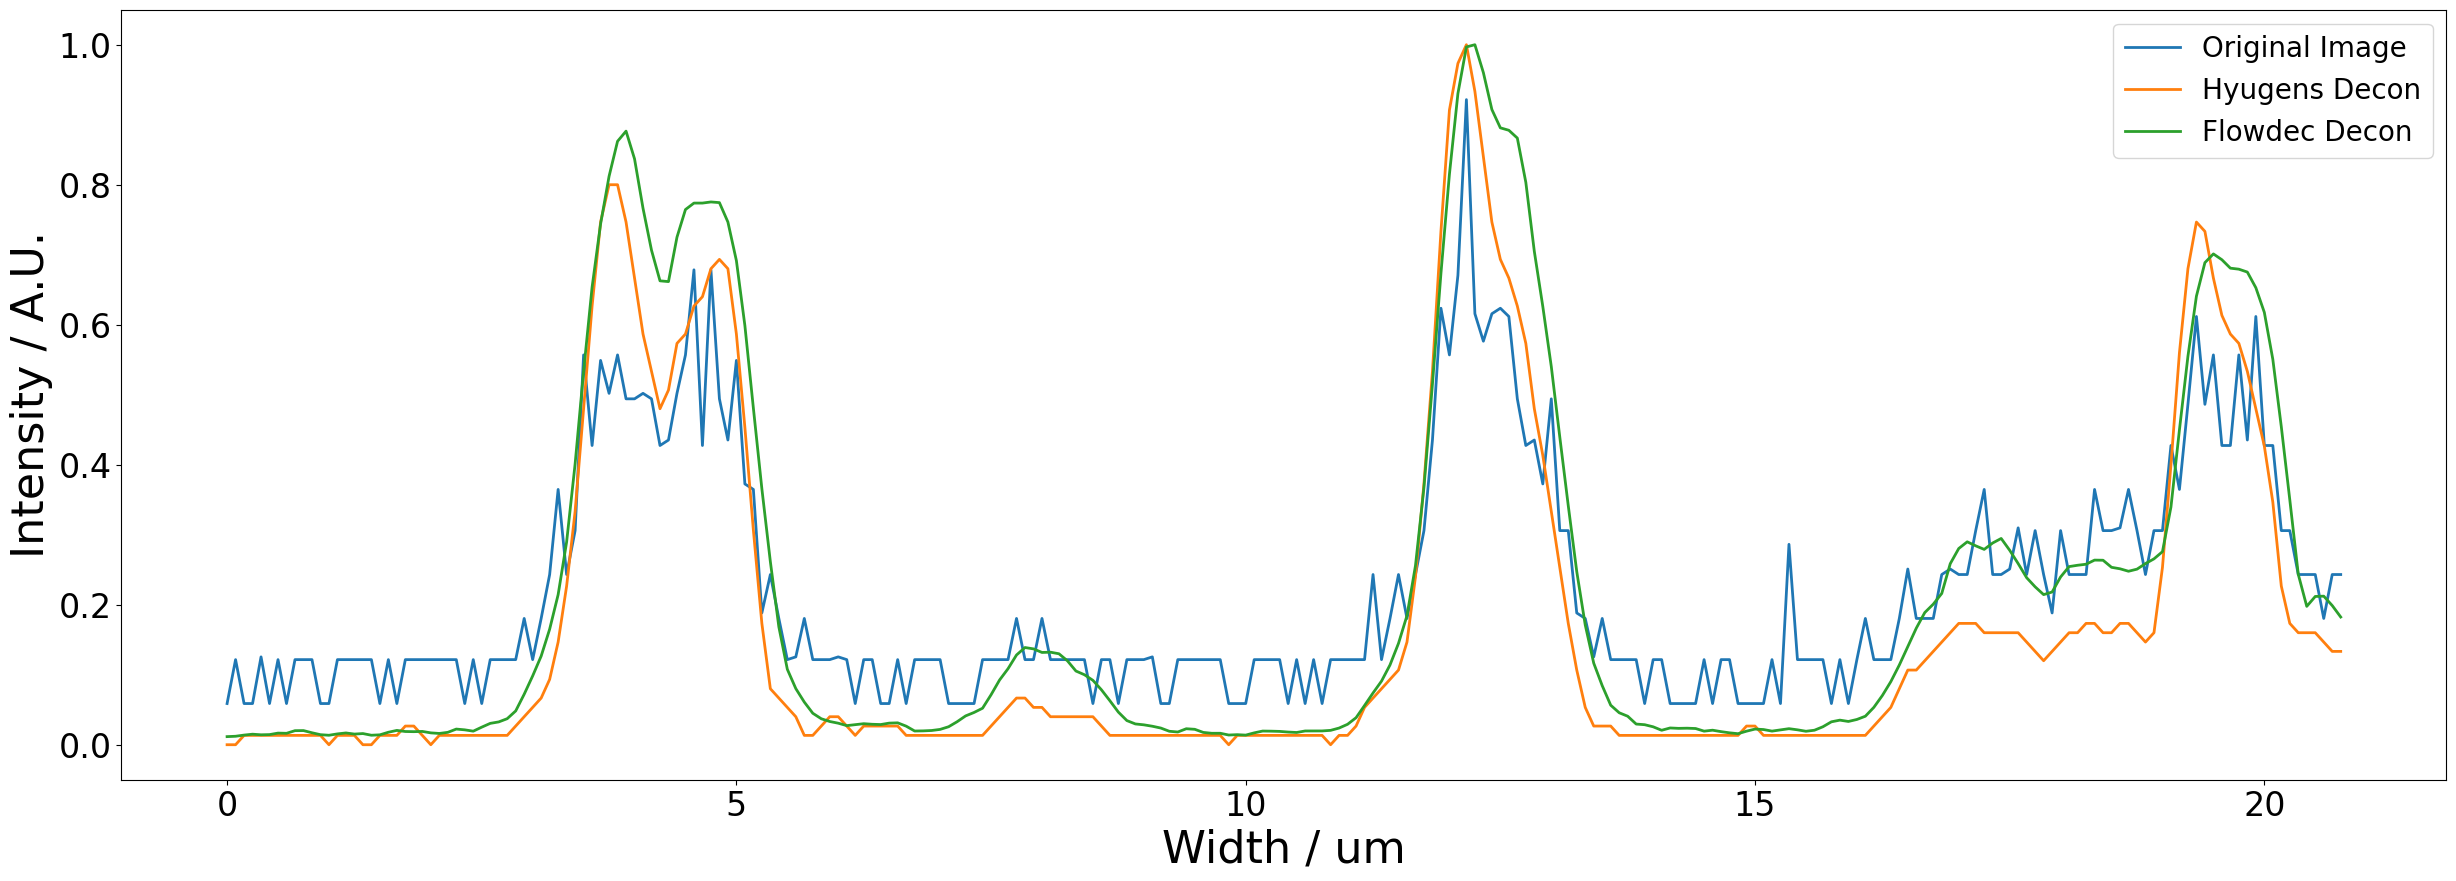

In [29]:
fig, axs = plt.subplots(1,1)
fig.set_size_inches(30, 10)
x = np.linspace(0,slices[1][1]-slices[1][0],250)*0.083

for i, d in enumerate(xz_projection_data):#res.data
    img = exposure.adjust_gamma(d,gamma=1)
    line = np.max(img[:,slices[1][0]:slices[1][1]]/np.max(np.max(img)),axis=0)
    axs.plot(x, line, label=titles[i],linewidth=2)
    #axs.set_title(titles[i],fontsize=26)
    axs.tick_params(axis='x', labelsize=24)
    axs.tick_params(axis='y', labelsize=24)
    axs.set_xlabel('Width / um', fontsize=32)
    axs.set_ylabel('Intensity / A.U.', fontsize=32)
    axs.legend(fontsize=20)
    axs.axis('on')